In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from google.colab import drive
from joblib import dump

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X_train = pd.read_csv("/content/drive/MyDrive/road_accidents/X_train_new.csv", index_col = 0)
y_train = pd.read_csv("/content/drive/MyDrive/road_accidents/y_train_new.csv", index_col = 0)

X_test = pd.read_csv("/content/drive/MyDrive/road_accidents/X_test_new.csv", index_col = 0)
y_test = pd.read_csv("/content/drive/MyDrive/road_accidents/y_test_new.csv", index_col = 0)

In [4]:
categorical_features = ["day_of_week", "first_road_class", "road_type", "junction_detail",
                   "second_road_class", "pedestrian_crossing_human_control",
                   "pedestrian_crossing_physical_facilities", "light_conditions", "weather_conditions",
                   "road_surface_conditions", "special_conditions_at_site", "carriageway_hazards",
                   "did_police_officer_attend_scene_of_accident", "vehicle_type", "towing_and_articulation",
                   "vehicle_manoeuvre", "vehicle_location_restricted_lane", "junction_location",
                   "skidding_and_overturning", "hit_object_in_carriageway", "hit_object_off_carriageway",
                   "vehicle_leaving_carriageway", "first_point_of_impact", "sex_of_driver", "vehicle_left_hand_drive",
                   "journey_purpose_of_driver", "casualty_class", "sex_of_casualty",
                   "pedestrian_location", "pedestrian_movement", "car_passenger", "bus_or_coach_passenger",
                   "pedestrian_road_maintenance_worker", "vehicle_direction_from", "vehicle_direction_to",
                   "age_band_of_casualty", "day_of_month", "month", "time_rounded",]

In [5]:
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

In [6]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

In [7]:
rf_model = RandomForestClassifier(random_state=42)

In [8]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,                  # Number of random parameter combinations to try
    scoring='f1_weighted',      # Use an appropriate metric (e.g., 'accuracy', 'f1_weighted', etc.)
    cv=3,                       # 3-fold cross-validation
    verbose=3,                  # Print progress
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available cores for parallel computation
)


In [9]:
random_search.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'max_depth': [5, 10, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='f1_weighted', verbose=3)

In [10]:
dump(random_search.best_estimator_, '/content/drive/MyDrive/road_accidents/best_random_forest_model.joblib')

['/content/drive/MyDrive/road_accidents/best_random_forest_model.joblib']

In [12]:
best_random_forest_model = random_search.best_estimator_

In [14]:
best_random_forest_model.score(X_train, y_train)

0.9874319500223114

In [13]:
best_random_forest_model.score(X_test, y_test)

0.8162516733601071

In [15]:
y_pred = best_random_forest_model.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.41      0.55      2367
           2       0.65      0.47      0.54     25007
           3       0.85      0.93      0.89     84676

    accuracy                           0.82    112050
   macro avg       0.77      0.60      0.66    112050
weighted avg       0.80      0.82      0.80    112050



In [20]:
cm = confusion_matrix(y_test, y_pred)

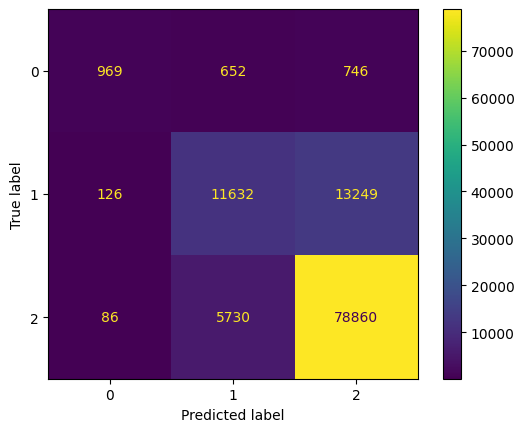

In [21]:
ConfusionMatrixDisplay(cm).plot()
plt.show()